### Imports

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import QTable, Table, Column
from astropy.io import ascii

### Data

In [20]:
##table2 is named manga here because it contains ALL MaNGA galaxies##
mangaHI = Table.read("input/mangaHIall.fits", format="fits") #GBT
alfaHI = Table.read("input/manga_dr15_alfalfa.fits", format="fits") #ALFALFA DR15 
alfaHI_full =  ascii.read('input/alfalfa_full.csv', format='csv') #All ALFALFA with HI detections
manga = Table.read("input/Pipe3D-master_file_vflag_10_smooth2p27_N2O2_noWords.txt", format="ascii.commented_header") 

wp20_manga = mangaHI["WP20"]
wf50_manga = mangaHI["WF50"]
wp50_manga = mangaHI["WP50"]

wp20_alfa = alfaHI["WP20"]
wf50_alfa = alfaHI["WF50"]

wf50_alfaHI_full = alfaHI_full['W50']
HImass_alfaHI_full = alfaHI_full['logMH']
HImass_manga = mangaHI["logMHI"]
HImass_alfa = alfaHI["LOGMHI"]

### Relationship between log(WF50) and log(MHI) of GBT and ALFALFA and All ALFALFA data


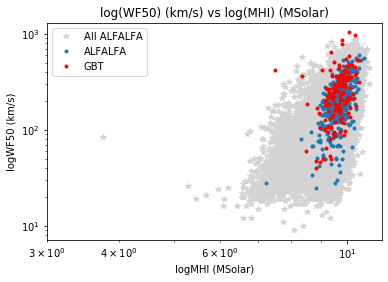

In [21]:
#log(WF50) vs log(MHI) plot to understand the relationship between the two

plt.semilogy(HImass_alfaHI_full, wf50_alfaHI_full, '*', label = 'All ALFALFA', color = 'lightgrey')
plt.semilogx(HImass_alfa, wf50_alfa, ".", label="ALFALFA")
plt.semilogy(HImass_manga, wf50_manga, ".", label="GBT", color = 'red')
plt.xlabel("logMHI (MSolar)")
plt.ylabel("logWF50 (km/s)")
plt.xlim(xmin=3,xmax=11.5)
plt.title('log(WF50) (km/s) vs log(MHI) (MSolar)')
plt.legend()
plt.savefig('plots/logWF50-logMHI.svg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='svg', pad_inches=0.1)
plt.show()

### Adding MStar from all MaNGA data to GBT and ALFALFA data with HI detections

**GBT**

In [22]:
mangaHI['MStar'] = np.zeros(len(mangaHI), dtype = np.float64) #initializes the new list of 0 with len same as mangaHI, name Stellar Mass, and type int32
mangaHI['logMStar'] = np.zeros(len(mangaHI), dtype = np.float64)
mangaHI['Plate'] = np.zeros(len(mangaHI), dtype = np.int32)
mangaHI['IFU'] = np.zeros(len(mangaHI), dtype = np.int32)

for i in range(len(mangaHI)):
    galID = mangaHI['plateifu'][i]
    plate, IFU = galID.split('-')
    mangaHI['Plate'][i] = plate
    mangaHI['IFU'][i] = IFU
    
    #Find the corresponding row index for this galaxy in the MaNGA data table
    plate_boolean = manga['MaNGA_plate'] == int(plate)
    IFU_boolean = manga['MaNGA_IFU'] == int(IFU)
    manga_boolean = np.logical_and(plate_boolean, IFU_boolean)
    
    mangaHI['MStar'][i] = manga['NSA_Mstar'][manga_boolean]
    mangaHI['logMStar'][i] = np.log10(manga['NSA_Mstar'][manga_boolean])
    
mangaHI.remove_column('plateifu')
    

In [23]:
mangaHI.write('out_txt/GBT_HI_with_MStar.txt', format='ascii.commented_header', overwrite = True)

***ALFALFA***

In [24]:
alfaHI['MStar'] = np.zeros(len(alfaHI), dtype = np.float64) #initializes the new list of 0 with len same as alfaHI, name Stellar Mass, and type int32
alfaHI['logMStar'] = np.zeros(len(alfaHI), dtype = np.float64)
alfaHI['Plate'] = np.zeros(len(alfaHI), dtype = np.int32)
alfaHI['IFU'] = np.zeros(len(alfaHI), dtype = np.int32)

for i in range(len(alfaHI)):
    galID = alfaHI['PLATEIFU'][i]
    plate, IFU = galID.split('-')
    alfaHI['Plate'][i] = plate
    alfaHI['IFU'][i] = IFU
    
    #Find the corresponding row index for this galaxy in the MaNGA data table
    plate_boolean = manga['MaNGA_plate'] == int(plate)
    IFU_boolean = manga['MaNGA_IFU'] == int(IFU)
    manga_boolean = np.logical_and(plate_boolean, IFU_boolean)
    
    alfaHI['MStar'][i] = manga['NSA_Mstar'][manga_boolean]
    alfaHI['logMStar'][i] = np.log10(manga['NSA_Mstar'][manga_boolean])
    
alfaHI.remove_column('PLATEIFU')

In [25]:
alfaHI.write('out_txt/ALFALFA_HI_with_MStar.txt', format='ascii.commented_header', overwrite = True)

In [26]:
alfaHI

MANGAID,OBJRA,OBJDEC,VOPT,RMS,LOGHILIM200KMS,SNR,FHI,LOGMHI,VHI,EV,WP20,WF50,SEP,DV,AGC,MStar,logMStar,Plate,IFU
bytes9,float64,float64,int16,float32,float32,float32,float32,float32,int16,float32,int16,int16,float32,float32,int32,float64,float64,int32,int32
1-404249,194.523423939,29.0173526307,7697,2.0635254,9.071094,-999.0,-999.0,-999.0,-999,-999.0,-999,-999,-999.0,-999.0,-999,2118213760.0,9.325969784904645,8935,12701
1-389685,146.701429799,31.7195786864,6593,2.2982213,8.983405,-999.0,-999.0,-999.0,-999,-999.0,-999,-999,-999.0,-999.0,-999,1162803584.0,9.065506361685442,8150,12701
1-296190,245.441960986,25.82067799,14385,2.9384093,9.767684,-999.0,-999.0,-999.0,-999,-999.0,-999,-999,-999.0,-999.0,-999,149067743232.0,11.173383676639219,9047,12701
1-456850,194.634485129,28.3779606067,5881,2.056302,8.835876,-999.0,-999.0,-999.0,-999,-999.0,-999,-999,-999.0,-999.0,-999,1464497408.0,9.165688607364634,9876,12701
1-382648,117.216794454,17.3562665374,11857,2.14,9.528299,19.8,3.55,10.4,11856,14.0,161,349,33.935574,1.44976,170886,21945460736.0,10.341344703112272,9492,12701
1-421314,203.730622609,31.3935143722,4964,2.64,8.8348255,77.2,13.21,10.23,4962,1.0,126,209,19.044094,2.62804,8560,4614824960.0,9.664155232913872,8985,12701
1-387106,138.844792279,27.2866441561,13728,3.2183442,9.766621,-999.0,-999.0,-999.0,-999,-999.0,-999,-999,-999.0,-999.0,-999,62198484992.0,10.793779806433141,9505,12701
1-163887,119.708713628,25.7462565372,12723,2.32,9.629109,14.1,1.56,10.1,12729,10.5,300,113,20.857912,5.69786,172218,3947198208.0,9.59628893497909,8940,12701
1-614850,172.051190682,21.9968427778,6311,2.15,8.992961,41.5,5.52,10.07,6309,4.5,161,190,10.954871,2.47954,6465,5271754240.0,9.721955156005592,8338,12701


### Relationship between log(WF50) and log(MStar) of GBT and ALFALFA data

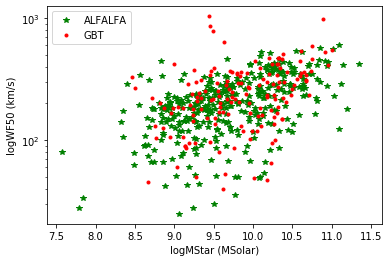

In [27]:
#log(WF50) vs log(MStar) plot to understand the relationship between the two

plt.semilogy(alfaHI['logMStar'],alfaHI['WF50'], '*', label = "ALFALFA", color = 'green')
plt.semilogy(mangaHI['logMStar'],mangaHI['WF50'],'.', label="GBT", color='red')
plt.xlabel('logMStar (MSolar)')
plt.ylabel('logWF50 (km/s)')
plt.legend()
plt.savefig('plots/logWF50-logMstar.svg', dpi=500, facecolor='w', edgecolor='w', orientation='portrait', format='svg', pad_inches=0.1)
plt.show()